# Linear Regression

In this notebook, we'll discover the mathematical basics and some examples of linear regression.

It's a linear model that assumes a linear relationship between input variables (x) and an output variable (y):
$$
y = m*x + c
$$

We start by taking mean of x ($x_i$) and y ($y_i$) data points, this gives us a point on our line of regression. Next, we use this mean point to calculate the slope (m) of our line as

$$
m = \frac{\sum (x-x_i)(y-y_i)}{\sum (x-x_i)^{2}}
$$

Finally, we can find the intercept (c) by solving the equation at point $(x_i,y_i)$.

$$
c = y_i - m*x_i
$$

In [89]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Example

Let's assume a model that maps a rider's speed to time it takes to travel a fixed distance
$$
Time = m*speed + c
$$

This model has a negative relationship. As speed increases, time required to travel a fixed distance decreases.

The given data is
$$
x = [1,2,3,4,5]\\
y = [3,2,2,4,3]
$$

In [90]:
x = np.array([1,2,3,4,5])
y = np.array([3,2,2,4,3])
xi = np.mean(x)
yi = np.mean(y)
print(f'Mean point: {xi=}, {yi=}')

Mean point: xi=3.0, yi=2.8


Now, we plot data points and mean point to observe it visually,

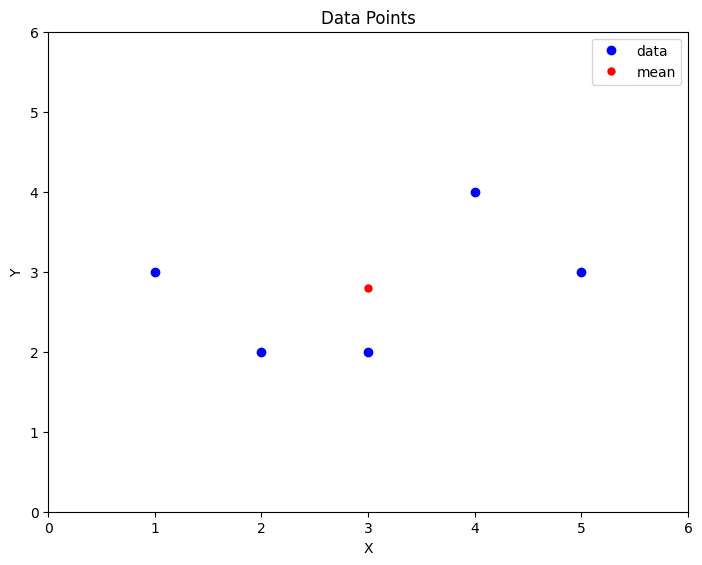

In [91]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.plot(x, y, 'bo', label='data')
ax1.plot(xi, yi, 'o',
         markersize=4,
         markerfacecolor='red',
         markeredgecolor='red',
         markeredgewidth=2,
         label='mean')
# set axes limits by
# plt.xlim(0,6)
# plt.ylim(0,6)
# or
ax1.axis([0,6,0,6])
ax1.set_title('Data Points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
plt.legend()
plt.show()

Prepare ranges to plot dotted line guides.

In [62]:
# dotted lines for the mean point
xy_guide = np.linspace(0,yi,10)
xx_marker = np.ones(xy_guide.shape)*xi
yx_guide = np.linspace(0,xi,10)
yy_marker = np.ones(yx_guide.shape)*yi

#print(f'{yx_guide=}, {yy_marker=}')

Calculate parameters (m, c) of the line of regression.

In [79]:
# parameters for line of regression
x_dev = x - xi
sum_x_dev2 = np.sum(np.power(x_dev, 2))
sum_xd_yd = np.sum(x_dev * (y - yi))
m = sum_xd_yd / sum_x_dev2
c = yi - m*xi
X = np.linspace(0, 6, 21)
Y = X*m + c
print(f'{m=}, {c=}')

m=0.2, c=2.1999999999999997


Finally, plot it all. The line, prediction error, scatter plot, mean point and the line guides.

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the `ax.set()` method to set all these properties at once:

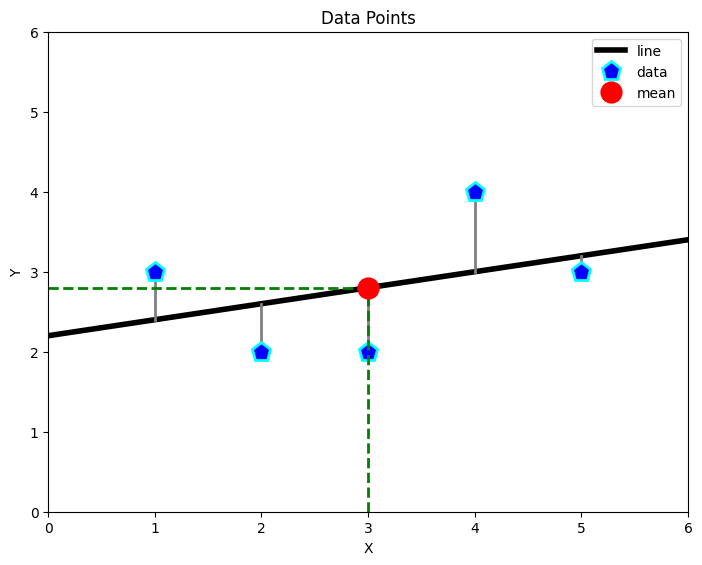

In [88]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
# line of regression
ax2.plot(X, Y,
         '-', color='black',
         linewidth=4,
         label='line')
# prediction error
for xx, yy in zip(x,y):
    ax2.plot([xx]*2, [xx*m + c, yy],
             '-', color='gray',
             linewidth=2)
# data points
ax2.plot(x, y, 'p',
         markersize=14,
         markerfacecolor='blue',
         markeredgecolor='cyan',
         markeredgewidth=2,
         label='data')
# mean point and dotted line guides
ax2.plot(xx_marker, xy_guide, 'g--',
         linewidth=2)
ax2.plot(yx_guide, yy_marker, 'g--',
         linewidth=2)
ax2.plot(xi, yi, 'o',
         markersize=14,
         markerfacecolor='red',
         markeredgecolor='red',
         markeredgewidth=2,
         label='mean')
# set all properties using OO-interface
ax2.set(xlim=(0, 6), ylim=(0, 6),
       xlabel='X', ylabel='Y',
       title='Data Points');
plt.legend()
plt.show()